In [1]:
import os
import numpy as np
import cv2

import skimage
import skimage.io
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import sklearn.metrics
import pickle
import torch
from PIL import Image


from matplotlib import pyplot as plt

import contr_dissimilarity

c:\Users\joaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\joaof\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.2' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
resultados = "C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_segmentada_4c"
diretorio_imagens = "C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Dataset/Feitos/segmentado4classes"

In [3]:
from PIL import Image

def converter_grayscale_para_rgb(imagem):
    # Abrir a imagem dentro do bloco "with" para garantir que ela seja fechada corretamente
    with Image.open(imagem) as img:
        # Se a imagem for em escala de cinza (modo 'L'), converta para RGB
        if img.mode == 'L':
            img_rgb = img.convert('RGB')
        else:
            img_rgb = img.copy()  # Faz uma cópia para evitar manter a referência aberta

    return img_rgb  # Retorna a imagem RGB sem manter o arquivo aberto


In [4]:
# Dimensões desejadas para redimensionar as imagens
TARGET_WIDTH = 128
TARGET_HEIGHT = 128

# Lista de tamanhos para os subconjuntos de treino
tamanhos = [10, 100, 500, 1000, 3500, 7000, 10000]  # Substitua pelos valores desejados

# Diretório contendo as imagens organizadas por classes
diretorio_imagens = diretorio_imagens  # Atualize para o caminho correto

# Inicialize listas para armazenar todas as imagens e rótulos
todas_imagens = []
todos_rotulos = []
datasets = {}
min_samples_per_class=1

for clazz in os.listdir(diretorio_imagens):
  image_files = list(filter(lambda file: file.lower().endswith((".png", ".jpg", ".jpeg")), os.listdir(f"{diretorio_imagens}/{clazz}")))
  if len(image_files) <min_samples_per_class:
      continue
  print(f"{clazz}: {len(image_files)}")


  for img_filename in os.listdir(f"{diretorio_imagens}/{clazz}"):
    complete_filename=f"{diretorio_imagens}/{clazz}/{img_filename}"
    # img = skimage.io.imread(complete_filename)
    img_rgb = converter_grayscale_para_rgb(complete_filename)
    img = img_rgb

    if img is not None:
        todas_imagens.append(img)
        todos_rotulos.append(clazz)


# Converter listas para arrays
todas_imagens = np.array(todas_imagens, dtype=np.uint8)
todos_rotulos = LabelEncoder().fit_transform(todos_rotulos)

# Dividir o conjunto de imagens em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(
    todas_imagens, todos_rotulos, test_size=0.2, random_state=180875, stratify=todos_rotulos
)
#-----------------------------------------------------------------------------------------------------------------#
# Criar subconjuntos de treino para cada tamanho especificado
for tamanho in tamanhos:
    print(f"\nProcessando subconjunto de treino com {tamanho} imagens por classe...")

    # Inicializar listas para o subconjunto atual
    X_train_sub = []
    Y_train_sub = []

    for classe in np.unique(Y_train):
        # Obter índices das imagens da classe atual
        indices_classe = np.where(Y_train == classe)[0]
        print("antes do shuffle:",indices_classe)

        if len(indices_classe) == 0:
            print(f"A classe {classe} não possui imagens suficientes no conjunto de treino!")
            continue

        # Embaralhar os índices
        np.random.shuffle(indices_classe)
        print("pós shuffle:",indices_classe)
    

        # Selecionar o número desejado de imagens ou todas as disponíveis, o que for menor
        indices_selecionados = indices_classe[0: tamanho]
        print(" Quais os que foram selecionados:",indices_selecionados)

        # Adicionar as imagens e rótulos ao subconjunto
        X_train_sub.extend(X_train[indices_selecionados])
        Y_train_sub.extend(Y_train[indices_selecionados])

    # Verificar se há dados suficientes no subconjunto gerado
    if len(X_train_sub) == 0:
        print(f"Nenhuma imagem foi selecionada para o tamanho {tamanho}. Verifique os dados disponíveis.")
        continue

    # Converter listas para arrays numpy
    X_train_sub = np.array(X_train_sub, dtype=np.uint8)
    Y_train_sub = np.array(Y_train_sub, dtype=np.uint8)

    # Adicionar ao dicionário
    datasets[tamanho] = {
        "X_train": X_train_sub,
        "Y_train": Y_train_sub,
    }

    # Salvar o subconjunto de treino gerado
    np.save(f"X_train_{tamanho}.npy", X_train_sub)
    np.save(f"Y_train_{tamanho}.npy", Y_train_sub)

    print(f"Subconjunto de treino para tamanho {tamanho} armazenado com sucesso!")

# Exemplo de acesso aos dados processados
print("\nConjuntos processados:")
print("\nProcessamento concluído!")

covid19: 6483
normal: 5083
pneumonia: 4273
tuberculosis: 700

Processando subconjunto de treino com 10 imagens por classe...
antes do shuffle: [    0    10    11 ... 13226 13227 13228]
pós shuffle: [ 7675  4933  6116 ...  4312  4450 11464]
 Quais os que foram selecionados: [ 7675  4933  6116 10566  8476  5199   112  6462 11731  7444]
antes do shuffle: [    1     3     4 ... 13207 13217 13229]
pós shuffle: [11638  2702   339 ...  9020  9545  4760]
 Quais os que foram selecionados: [11638  2702   339 12519   327   162  8299 12049  6038  9189]
antes do shuffle: [    2     5     6 ... 13210 13214 13220]
pós shuffle: [11240 11498  7393 ...  1282  4190  8603]
 Quais os que foram selecionados: [11240 11498  7393  8500  4284 10178  9554  5466 10426  3777]
antes do shuffle: [  116   135   180   207   210   249   297   310   342   355   452   485
   528   546   577   595   597   617   624   655   657   773   787   814
   822   832   868   870   901   929   940   951   966   980   994  1067
  107

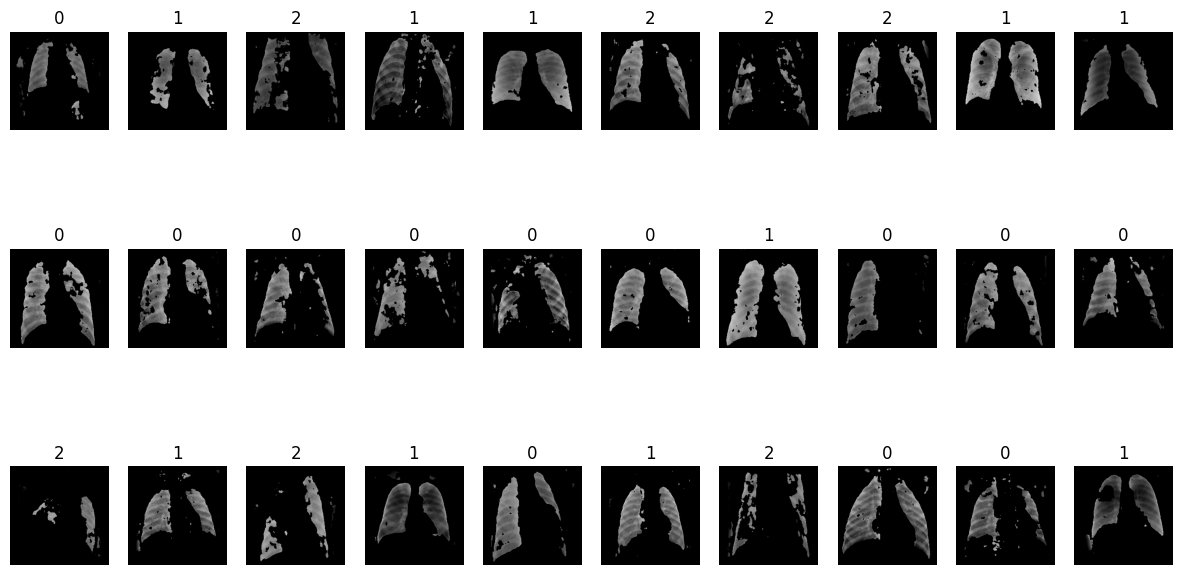

In [5]:
# Visualize some images and their corresponding labels.
plt.figure(figsize = (15, 8))
for i in range(30):
  ax = plt.subplot(3, 10, i + 1)
  plt.imshow(X_train[i] / 255.)
  plt.title(Y_train[i])
  plt.axis("off")

In [ ]:
model = {}
# Itera sobre os conjuntos de dados processados
for tamanho, dataset in datasets.items():
    print(f"Treinando modelo para o conjunto com {tamanho} imagens por classe...")

    # Define o local de salvamento do modelo para o tamanho atual
    modelo_path = os.path.join(resultados, f"model_{tamanho}.pth")
    
    # Treina o modelo usando os dados do tamanho atual
    model[tamanho] = contr_dissimilarity.train(
        datasets[tamanho]["X_train"],datasets[tamanho]["Y_train"],
        save_location=modelo_path,
        warmup_iterations=2000,
        iterations=2000,
        embeddingsize=128,
        temperature=0.5,
        batch_size=32,
        patch_size=None,
        projection_head=[128, 64, 32],
        lr_warmup=0.01,
        lr=0.001
    )
    
    print(f"Treinamento para {tamanho} imagens concluído.")

print("Todos os modelos foram treinados e salvos.")

Treinando modelo para o conjunto com 10 imagens por classe...
Model file: C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_segmentada_4c\model_10.pth
Training a new model...
Warmup Phase
Epoch 1, Warmup Loss: 1.3858
Epoch 2, Warmup Loss: 1.3875
Epoch 3, Warmup Loss: 1.3806
Epoch 4, Warmup Loss: 1.3865
Epoch 5, Warmup Loss: 1.3801
Epoch 6, Warmup Loss: 1.3880
Epoch 7, Warmup Loss: 1.3798
Epoch 8, Warmup Loss: 1.0824
Epoch 9, Warmup Loss: 0.6116
Epoch 10, Warmup Loss: 0.4590
Epoch 11, Warmup Loss: 0.3862
Epoch 12, Warmup Loss: 0.3099
Epoch 13, Warmup Loss: 0.2875
Epoch 14, Warmup Loss: 0.2473
Epoch 15, Warmup Loss: 0.2444
Epoch 16, Warmup Loss: 0.2162
Epoch 17, Warmup Loss: 0.2051
Epoch 18, Warmup Loss: 0.1711
Epoch 19, Warmup Loss: 0.1700
Epoch 20, Warmup Loss: 0.1625
Training Phase
Epoch 1, Training Loss: 0.1146
Epoch 2, Training Loss: 0.0323
Epoch 3, Training Loss: 0.0158
Epoch 4, Training Loss: 0.0104
Epoch 5, Training Loss: 0.0064
Epoch 6, Training Los

In [7]:
train_embeddings = {}
test_embeddings = {}

for tamanho, dataset in datasets.items():
    print(f"Gerando embeddings para o conjunto com {tamanho} imagens por classe...")

    treino_sub = datasets[tamanho]["X_train"]
    model_sub = model[tamanho]

    # Definindo caminhos para salvar os embeddings
    train_cache_path = os.path.join(resultados, f"train_embedding_{tamanho}.pkl")
    test_cache_path = os.path.join(resultados, f"test_embedding_{tamanho}.pkl")

    # Gerando embeddings para o conjunto de treino
    train_embeddings[tamanho] = contr_dissimilarity.generate_embedding(
        model_sub,  # Passando o modelo carregado
        treino_sub, #conjunto de datasets
        patch_size=(64, 64),  # Ajuste o tamanho do patch conforme necessário
        cache=train_cache_path
    )
    print(f"Train embeddings salvos em: {train_cache_path}")

    # Gerando embeddings para o conjunto de teste
    test_embeddings[tamanho] = contr_dissimilarity.generate_embedding(
        model_sub,  # Passando o modelo carregado
        X_test,
        patch_size=(64, 64),  # Ajuste o tamanho do patch conforme necessário
        cache=test_cache_path
    )
    print(f"Test embeddings salvos em: {test_cache_path}")

    print(f"Embeddings para {tamanho} imagens concluídos.\n")

print("Geração de embeddings concluída para todos os conjuntos.")




Gerando embeddings para o conjunto com 10 imagens por classe...
Train embeddings salvos em: C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\train_embedding_10.pkl
Test embeddings salvos em: C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\test_embedding_10.pkl
Embeddings para 10 imagens concluídos.

Geração de embeddings concluída para todos os conjuntos.


Gerando projeção UMAP para o conjunto com 10 imagens por classe...


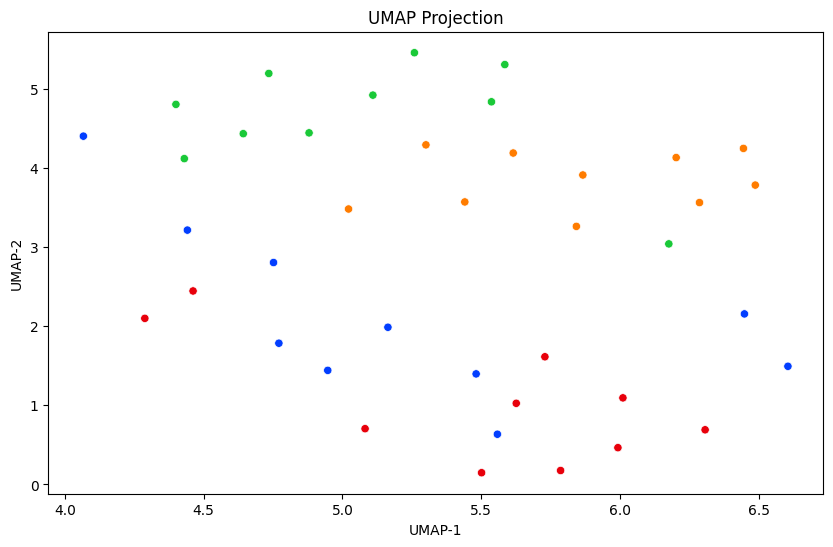

Projeção UMAP de treino salva em: C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\train_umap_10.png


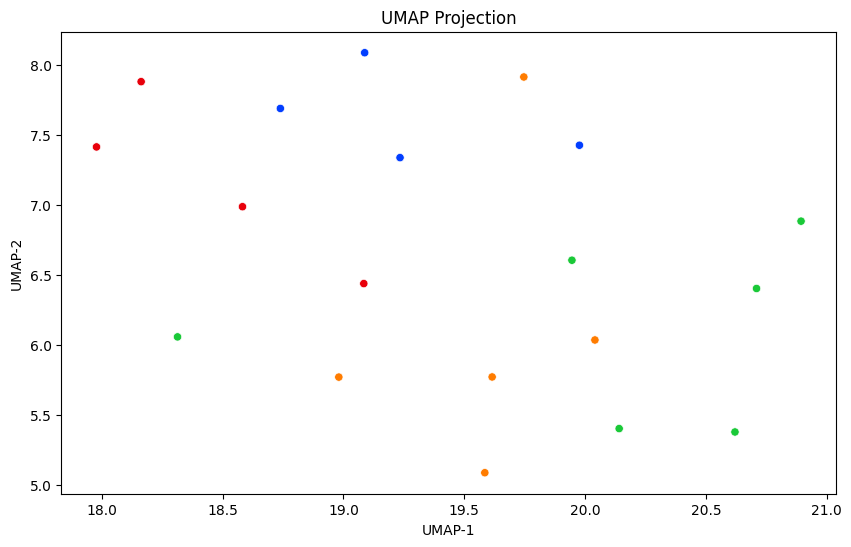

Projeção UMAP de teste salva em: C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\test_umap_10.png
Projeções UMAP concluídas para o conjunto com 10 imagens por classe.

Projeções UMAP concluídas para todos os conjuntos.


In [8]:
train_umap ={}
test_umap = {}
for tamanho, dataset in datasets.items():
    print(f"Gerando projeção UMAP para o conjunto com {tamanho} imagens por classe...")
    
    Y_train = datasets[tamanho]["Y_train"]
    
    # Projeção UMAP para treino
    train_umap[tamanho] = contr_dissimilarity.umap_projection(train_embeddings[tamanho], datasets[tamanho]["Y_train"])
    train_umap_path = os.path.join(resultados, f"train_umap_{tamanho}.png")
    print(f"Projeção UMAP de treino salva em: {train_umap_path}")
    
    # Projeção UMAP para teste
    test_umap[tamanho] = contr_dissimilarity.umap_projection(test_embeddings[tamanho], Y_test)
    test_umap_path = os.path.join(resultados, f"test_umap_{tamanho}.png")
    print(f"Projeção UMAP de teste salva em: {test_umap_path}")
    
    print(f"Projeções UMAP concluídas para o conjunto com {tamanho} imagens por classe.\n")

print("Projeções UMAP concluídas para todos os conjuntos.")


In [9]:
prototypes_cache = {}
prototypes = {}

for tamanho, dataset in datasets.items():
    print(f"Calculando protótipos para o conjunto com {tamanho} imagens por classe...")
    
    
    # Cálculo dos protótipos
    npp = int(tamanho/2)
    if npp>500:
        npp = 500

    prototypes_cache[tamanho] = os.path.join(resultados, f"prototypes_{tamanho}.pkl")
    X_prot, Y_prot = contr_dissimilarity.compute_prototypes(
        train_embeddings[tamanho], datasets[tamanho]["Y_train"], n_prototypes=npp, method="kmeans", cache=prototypes_cache[tamanho],
    )

    prototypes[tamanho] = {"X_prot": X_prot, "Y_prot": Y_prot}
    
    print(f"Protótipos calculados e salvos em: {prototypes_cache}")
    print(f"Número de protótipos gerados: {len(X_prot)}\n")

print("Cálculo de protótipos concluído para todos os conjuntos.")


Calculando protótipos para o conjunto com 10 imagens por classe...
Protótipos calculados e salvos em: {10: 'C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\\prototypes_10.pkl'}
Número de protótipos gerados: 20

Cálculo de protótipos concluído para todos os conjuntos.


Realizando projeção UMAP para os protótipos do conjunto com 10 imagens por classe...


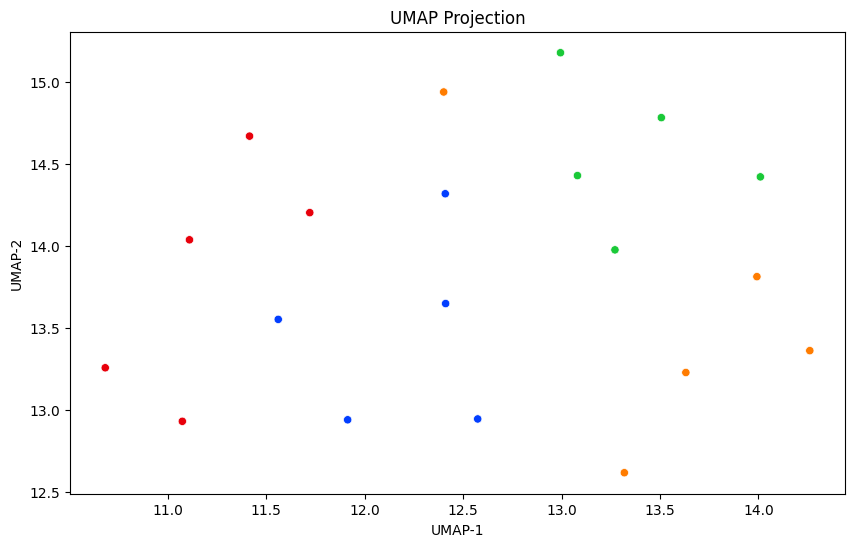

Projeção UMAP salva para: 10

Projeção UMAP concluída para todos os conjuntos.


In [10]:
for tamanho in datasets.keys():
    print(f"Realizando projeção UMAP para os protótipos do conjunto com {tamanho} imagens por classe...")

    # Nome do arquivo de saída
    output_file = os.path.join(resultados, f"umap_projection_{tamanho}.png")

    # Chamar a função e salvar o plot
    contr_dissimilarity.umap_projection(
        prototypes[tamanho]["X_prot"], prototypes[tamanho]["Y_prot"], save_path=output_file
    )

    print(f"Projeção UMAP salva em: {output_file}\n")

print("Projeção UMAP concluída para todos os conjuntos.")

In [11]:
contr_space_train = {}
contr_space_test = {}
contr_space_train_cache = {}
contr_space_test_cache = {}

for tamanho in datasets.keys():
    print(f"Gerando representações de espaço contrastivo para o conjunto com {tamanho} imagens por classe...")
    
    contr_space_train_cache[tamanho] = os.path.join(resultados, f"contr-space-train_{tamanho}.pkl")
    contr_space_test_cache[tamanho] = os.path.join(resultados, f"contr-space-test_{tamanho}.pkl")
    
    
    # Gerar representações de espaço contrastivo
    contr_space_train[tamanho] = contr_dissimilarity.space_representation(
        model[tamanho], train_embeddings[tamanho], prototypes[tamanho]["X_prot"], cache=contr_space_train_cache[tamanho]
    )
    contr_space_test[tamanho] = contr_dissimilarity.space_representation(
        model[tamanho], test_embeddings[tamanho], prototypes[tamanho]["X_prot"], cache=contr_space_test_cache[tamanho]
    )
    
    print(f"Representações de espaço contrastivo salvas em:")
    print(f"  - Treino: {contr_space_train_cache}")
    print(f"  - Teste: {contr_space_test_cache}\n")

print("Representações de espaço contrastivo geradas para todos os conjuntos.")


Gerando representações de espaço contrastivo para o conjunto com 10 imagens por classe...
Representações de espaço contrastivo salvas em:
  - Treino: {10: 'C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\\contr-space-train_10.pkl'}
  - Teste: {10: 'C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\\contr-space-test_10.pkl'}

Representações de espaço contrastivo geradas para todos os conjuntos.


In [12]:
contr_vector_train_cache = {}
contr_vector_test_cache = {}
contr_vector = {}

for tamanho in datasets.keys():
    print(f"Gerando representações vetoriais para o conjunto com {tamanho} imagens por classe...")

    # Caminhos para os arquivos cache
    contr_vector_train_cache[tamanho] = os.path.join(resultados, f"contr-vector-train_{tamanho}.pkl")
    contr_vector_test_cache[tamanho] = os.path.join(resultados, f"contr-vector-test_{tamanho}.pkl")

    # Gerar representações vetoriais para o conjunto de treino
    X_train_sub, Y_train_sub = contr_dissimilarity.vector_representation(
        model[tamanho], datasets[tamanho]["X_train"], datasets[tamanho]["Y_train"],
        prototypes[tamanho]["X_prot"], prototypes[tamanho]["Y_prot"],
        patch_size=(50, 50), variations=20, cache=contr_vector_train_cache[tamanho]
    )

    # Gerar representações vetoriais para o conjunto de teste
    X_test_sub, _ = contr_dissimilarity.vector_representation(
        model[tamanho], X_test, Y_test,
        prototypes[tamanho]["X_prot"], prototypes[tamanho]["Y_prot"],
        patch_size=(50, 50), variations=20, cache=contr_vector_test_cache[tamanho]
    )

    # Armazenar treino e teste no dicionário
    contr_vector[tamanho] = {
        "X_train_sub": X_train_sub,
        "Y_train_sub": Y_train_sub,
        "X_test_sub": X_test_sub,
    }

    print(f"Representações vetoriais salvas em:")
    print(f"  - Treino: {contr_vector_train_cache[tamanho]}")
    print(f"  - Teste: {contr_vector_test_cache[tamanho]}\n")

print("Representações vetoriais geradas para todos os conjuntos.")


Gerando representações vetoriais para o conjunto com 10 imagens por classe...
Representações vetoriais salvas em:
  - Treino: C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\contr-vector-train_10.pkl
  - Teste: C:/Users/joaof/Desktop/MestradoUEM/Artigos/MannaOmax/Resultados/dissimilaridade_completa_4c\contr-vector-test_10.pkl

Representações vetoriais geradas para todos os conjuntos.


Treinando e avaliando modelo para o conjunto com 10 imagens por classe...
Acurácia para 10 imagens por classe: 78.9%


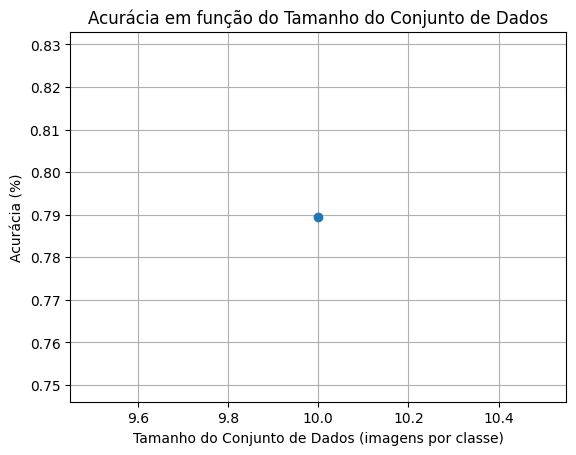

In [13]:
# Embending Classification
#  Inicialize o vetor de acurácias
acuracias_embending = []
Y_pred_emb = {}

# Itera sobre os diferentes tamanhos de dataset
for tamanho in datasets.keys():
    print(f"Treinando e avaliando modelo para o conjunto com {tamanho} imagens por classe...")

    # Treinar o classificador
    clf = sklearn.linear_model.LogisticRegression()
    clf.fit(train_embeddings[tamanho], datasets[tamanho]["Y_train"])

    # Fazer as predições
    Y_pred_emb[tamanho] = clf.predict(test_embeddings[tamanho])

    # Calcular a acurácia
    acc = sklearn.metrics.accuracy_score(Y_test, Y_pred_emb[tamanho])
    acuracias_embending.append(acc)  # Salvar a acurácia no vetor

    # Exibir a acurácia
    print(f"Acurácia para {tamanho} imagens por classe: {acc * 100:.1f}%")

# Plotar o gráfico com as acurácias
tamanhos = list(datasets.keys())  # Extrair os tamanhos dos datasets
plt.plot(tamanhos, acuracias_embending, marker='o')
plt.xlabel('Tamanho do Conjunto de Dados (imagens por classe)')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia em função do Tamanho do Conjunto de Dados')
plt.grid(True)
plt.show()

# Salvar o gráfico na pasta resultados
output_file = os.path.join(resultados, "embedding_accuracy.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()  # Fecha o plot para liberar memória

print(f"Gráfico salvo em: {output_file}")


Treinando e avaliando modelo para o conjunto com 10 imagens por classe...
Acurácia para 10 imagens por classe: 21.1%


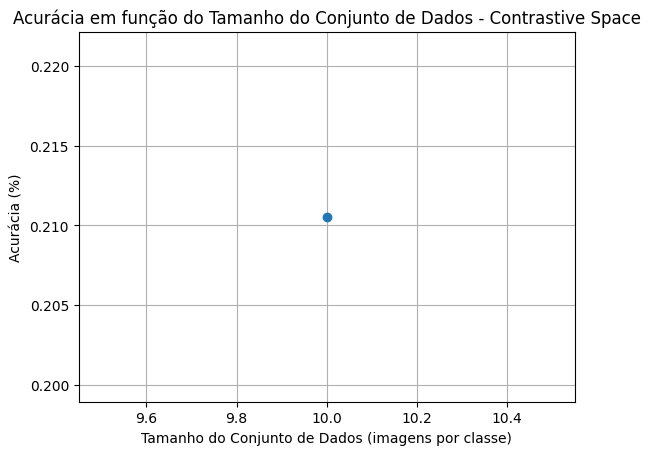

In [14]:
# Contrastive dissimilarity space classification
# Inicialize o vetor de acurácias
acuracias_dissimilatiy_space = []
Y_pred_spa = {}

# Itera sobre os diferentes tamanhos de dataset
for tamanho in datasets.keys():
    print(f"Treinando e avaliando modelo para o conjunto com {tamanho} imagens por classe...")

    # Treinar o classificador
    clf = sklearn.linear_model.LogisticRegression()
    clf.fit(contr_space_train[tamanho], datasets[tamanho]["Y_train"])

    # Fazer as predições
    Y_pred_spa[tamanho] = clf.predict(contr_space_test[tamanho])

    # Calcular a acurácia
    acc = sklearn.metrics.accuracy_score(Y_test, Y_pred_spa[tamanho])
    acuracias_dissimilatiy_space.append(acc)  # Salvar a acurácia no vetor

    # Exibir a acurácia
    print(f"Acurácia para {tamanho} imagens por classe: {acc * 100:.1f}%")

# Plotar o gráfico com as acurácias
tamanhos = list(datasets.keys())  # Extrair os tamanhos dos datasets
plt.plot(tamanhos, acuracias_dissimilatiy_space, marker='o')
plt.xlabel('Tamanho do Conjunto de Dados (imagens por classe)')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia em função do Tamanho do Conjunto de Dados - Contrastive Space')
plt.grid(True)
plt.show()

# Salvar o gráfico na pasta resultados
output_file = os.path.join(resultados, "space_accuracy.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()  # Fecha o plot para liberar memória

print(f"Gráfico salvo em: {output_file}")



Treinando e avaliando modelo para o conjunto com 10 imagens por classe...
Acurácia para o tamanho 10 imagens por classe: 15.8%


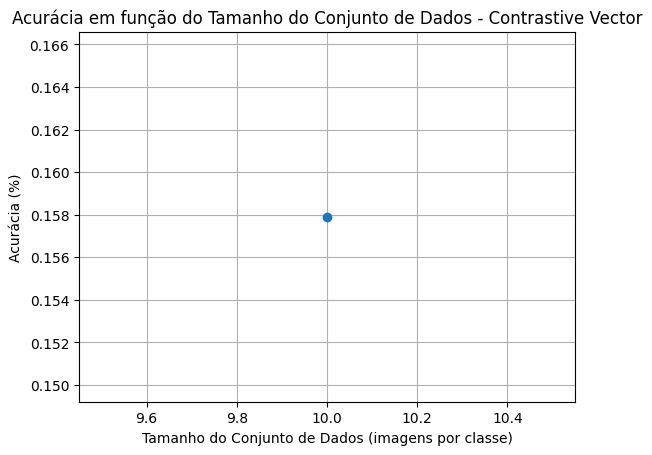

In [15]:
# Inicialize o vetor de acurácias
acuracias_dissimilatiy_vector = []
X_pred_proba = {}
X_pred_vector = {}

# Itera sobre os diferentes tamanhos de dataset
for tamanho in datasets.keys():
    print(f"\nTreinando e avaliando modelo para o conjunto com {tamanho} imagens por classe...")

    # Treinar o classificador
    clf = sklearn.linear_model.LogisticRegression()
    clf.fit(contr_vector[tamanho]["X_train_sub"], contr_vector[tamanho]["Y_train_sub"])

    # Fazer as predições com probabilidade
    X_pred_proba[tamanho] = clf.predict_proba(contr_vector[tamanho]["X_test_sub"])

    # Transformar a classificação binária de volta para multiclass
    # Aqui, o código assume que a função vector_to_class é responsável por converter probabilidades para classes
    X_pred_vector[tamanho] = contr_dissimilarity.vector_to_class(
        X_pred_proba[tamanho], Y_test, prototypes[tamanho]["Y_prot"]
    )

    # Calcular a acurácia
    acc = sklearn.metrics.accuracy_score(Y_test, X_pred_vector[tamanho])  # Deve ser escalar (float)

    # Salvar a acurácia no vetor
    acuracias_dissimilatiy_vector.append(acc)

    # Exibir a acurácia
    print(f"Acurácia para o tamanho {tamanho} imagens por classe: {acc * 100:.1f}%")

# Plotar o gráfico com as acurácias
tamanhos = list(datasets.keys())  # Extrair os tamanhos dos datasets
plt.plot(tamanhos, acuracias_dissimilatiy_vector, marker='o')
plt.xlabel('Tamanho do Conjunto de Dados (imagens por classe)')
plt.ylabel('Acurácia (%)')
plt.title('Acurácia em função do Tamanho do Conjunto de Dados - Contrastive Vector')
plt.grid(True)
plt.show()

# Salvar o gráfico na pasta resultados
output_file = os.path.join(resultados, "vector_accuracy.png")
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()  # Fecha o plot para liberar memória

print(f"Gráfico salvo em: {output_file}")
